# Trade History Analysis for Squid_Ink

This notebook explores the trade history data for Squid_Ink, analyzing execution prices, volumes, and their potential predictive value for future price movements.

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Add the trade_analysis directory to the path
sys.path.append(os.path.abspath('./'))
import trade_utils

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

## 1. Load Trade Data

First, let's load the trade history data for Squid_Ink and examine its structure.

In [3]:
# Load all trade data for Round 1
print("Loading trade data...")
trades = trade_utils.load_all_trade_data(1)
print(f"Loaded {len(trades)} trade records")

# Display the first few rows
trades.head()

Loading trade data...
Loaded 24886 trade records


,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,KELP,SEASHELLS,2002.0,1
1,0,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9996.0,1
2,0,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9996.0,1
3,0,NaN,NaN,SQUID_INK,SEASHELLS,2002.0,1
4,100,NaN,NaN,KELP,SEASHELLS,2002.0,6


In [4]:
# Check data types and missing values
print("Data types:")
print(trades.dtypes)

print("Missing values:")
print(trades.isnull().sum())

# Basic statistics
print("Basic statistics:")
trades.describe()

Data types:
timestamp      int64
buyer        float64
seller       float64
symbol        object
currency      object
price        float64
quantity       int64
dtype: object
Missing values:
timestamp        0
buyer        24886
seller       24886
symbol           0
currency         0
price            0
quantity         0
dtype: int64
Basic statistics:


,timestamp,buyer,seller,price,quantity
count,2.488600e+04,0.0,0.0,24886.000000,24886.000000
mean,1.487648e+06,NaN,NaN,4327.244475,2.635337
std,8.612380e+05,NaN,NaN,3635.744125,3.034512
min,0.000000e+00,NaN,NaN,1812.000000,0.000000
25%,7.308000e+05,NaN,NaN,1990.000000,1.000000
50%,1.487400e+06,NaN,NaN,2027.000000,1.000000
75%,2.223000e+06,NaN,NaN,9996.000000,2.000000
max,2.999600e+06,NaN,NaN,10005.000000,15.000000


In [5]:
# Filter for Squid_Ink trades
squid_trades = trade_utils.get_product_trades(trades, 'SQUID_INK')
print(f"Found {len(squid_trades)} Squid_Ink trades")

# Display the first few rows
squid_trades

Found 8837 Squid_Ink trades


,timestamp,buyer,seller,symbol,currency,price,quantity
3,0,NaN,NaN,SQUID_INK,SEASHELLS,2002.0,1
5,100,NaN,NaN,SQUID_INK,SEASHELLS,2001.0,6
7,1000,NaN,NaN,SQUID_INK,SEASHELLS,1999.0,10
9,1100,NaN,NaN,SQUID_INK,SEASHELLS,1999.0,1
12,1500,NaN,NaN,SQUID_INK,SEASHELLS,2000.0,1
...,...,...,...,...,...,...,...
8171,2998500,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,10
8173,2998700,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,1
8176,2998800,NaN,NaN,SQUID_INK,SEASHELLS,1831.0,1
8179,2999500,NaN,NaN,SQUID_INK,SEASHELLS,1830.0,2


## 2. Analyze Trade Metrics

Now, let's calculate various metrics from the trade data to understand patterns in execution prices and volumes.

In [6]:
# Calculate trade metrics
squid_metrics = trade_utils.calculate_trade_metrics(squid_trades)

# Display the first few rows
squid_metrics

,volume,num_trades,avg_price,min_price,max_price,price_range,total_value
timestamp,,,,,,,
0,1,1,2002.0,2002.0,2002.0,0.0,2002.0
100,6,1,2001.0,2001.0,2001.0,0.0,12006.0
1000,10,1,1999.0,1999.0,1999.0,0.0,19990.0
1100,1,1,1999.0,1999.0,1999.0,0.0,1999.0
1500,1,1,2000.0,2000.0,2000.0,0.0,2000.0
...,...,...,...,...,...,...,...
2998500,13,2,1840.0,1840.0,1840.0,0.0,23920.0
2998700,1,1,1840.0,1840.0,1840.0,0.0,1840.0
2998800,1,1,1831.0,1831.0,1831.0,0.0,1831.0


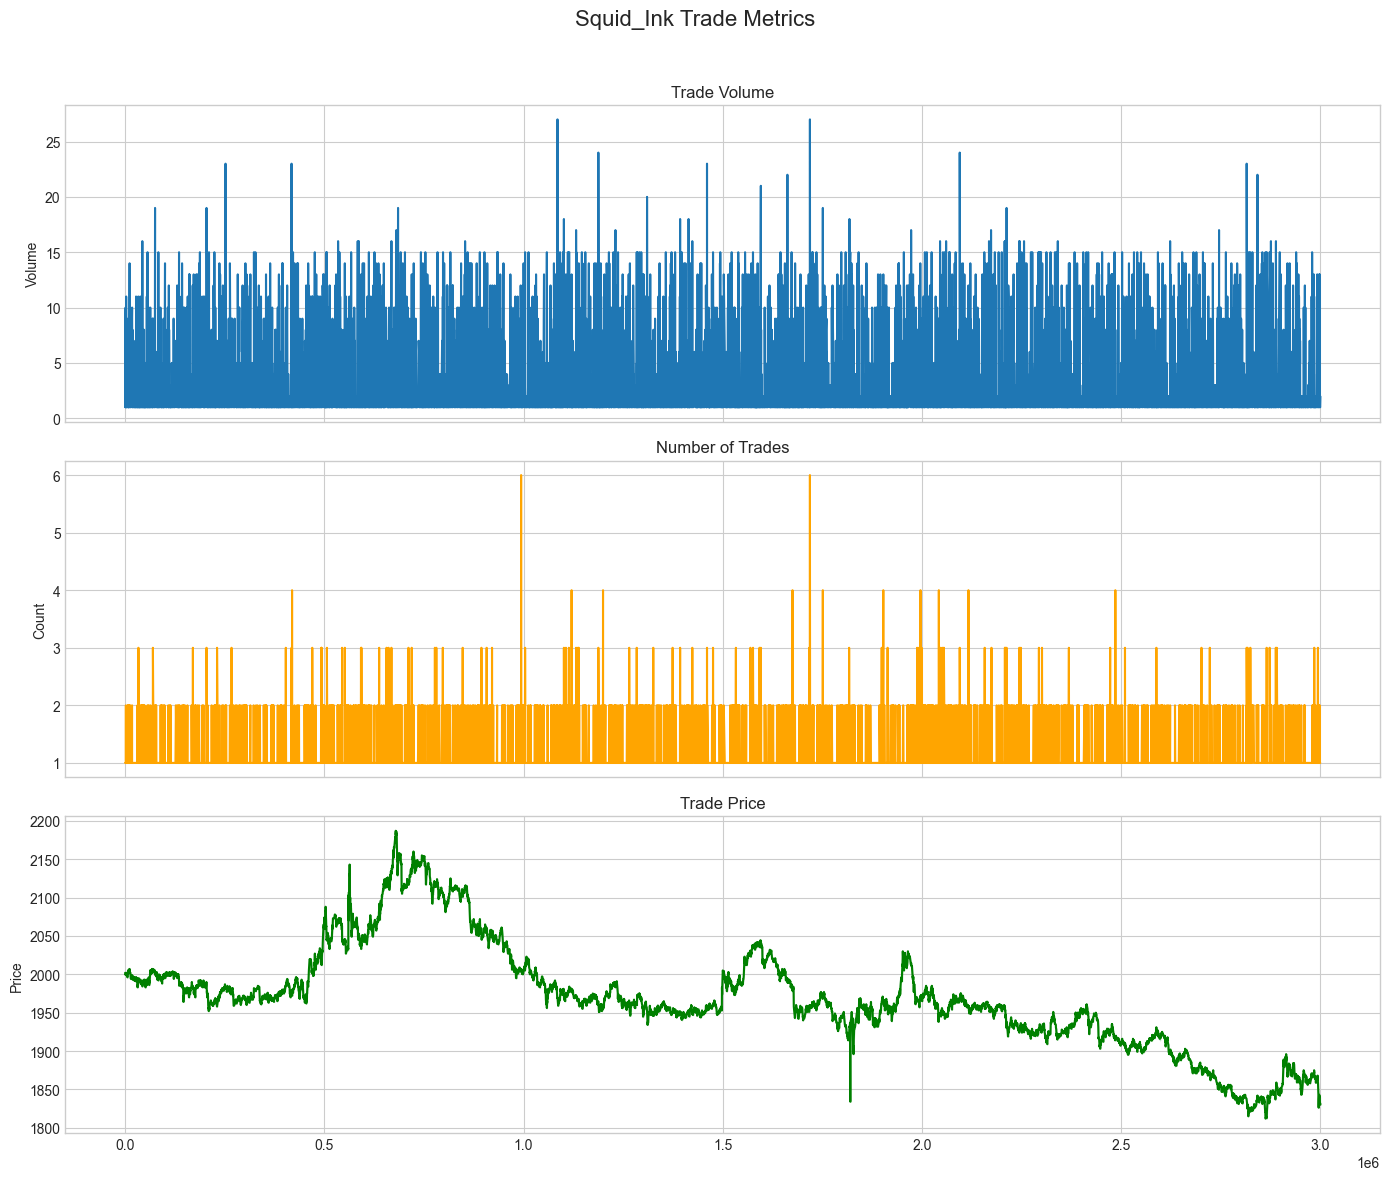

In [7]:
# Plot trade metrics
trade_utils.plot_trade_metrics(squid_metrics, title='Squid_Ink Trade Metrics')
plt.show()

In [8]:
# Calculate rolling metrics
rolling_metrics = trade_utils.calculate_rolling_metrics(squid_metrics, window=20)

# Display the first few rows
rolling_metrics.head()

,rolling_volume,rolling_num_trades,rolling_avg_price,rolling_price_volatility,rolling_volume_volatility,rolling_price_range
timestamp,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN
1100,NaN,NaN,NaN,NaN,NaN,NaN
1500,NaN,NaN,NaN,NaN,NaN,NaN


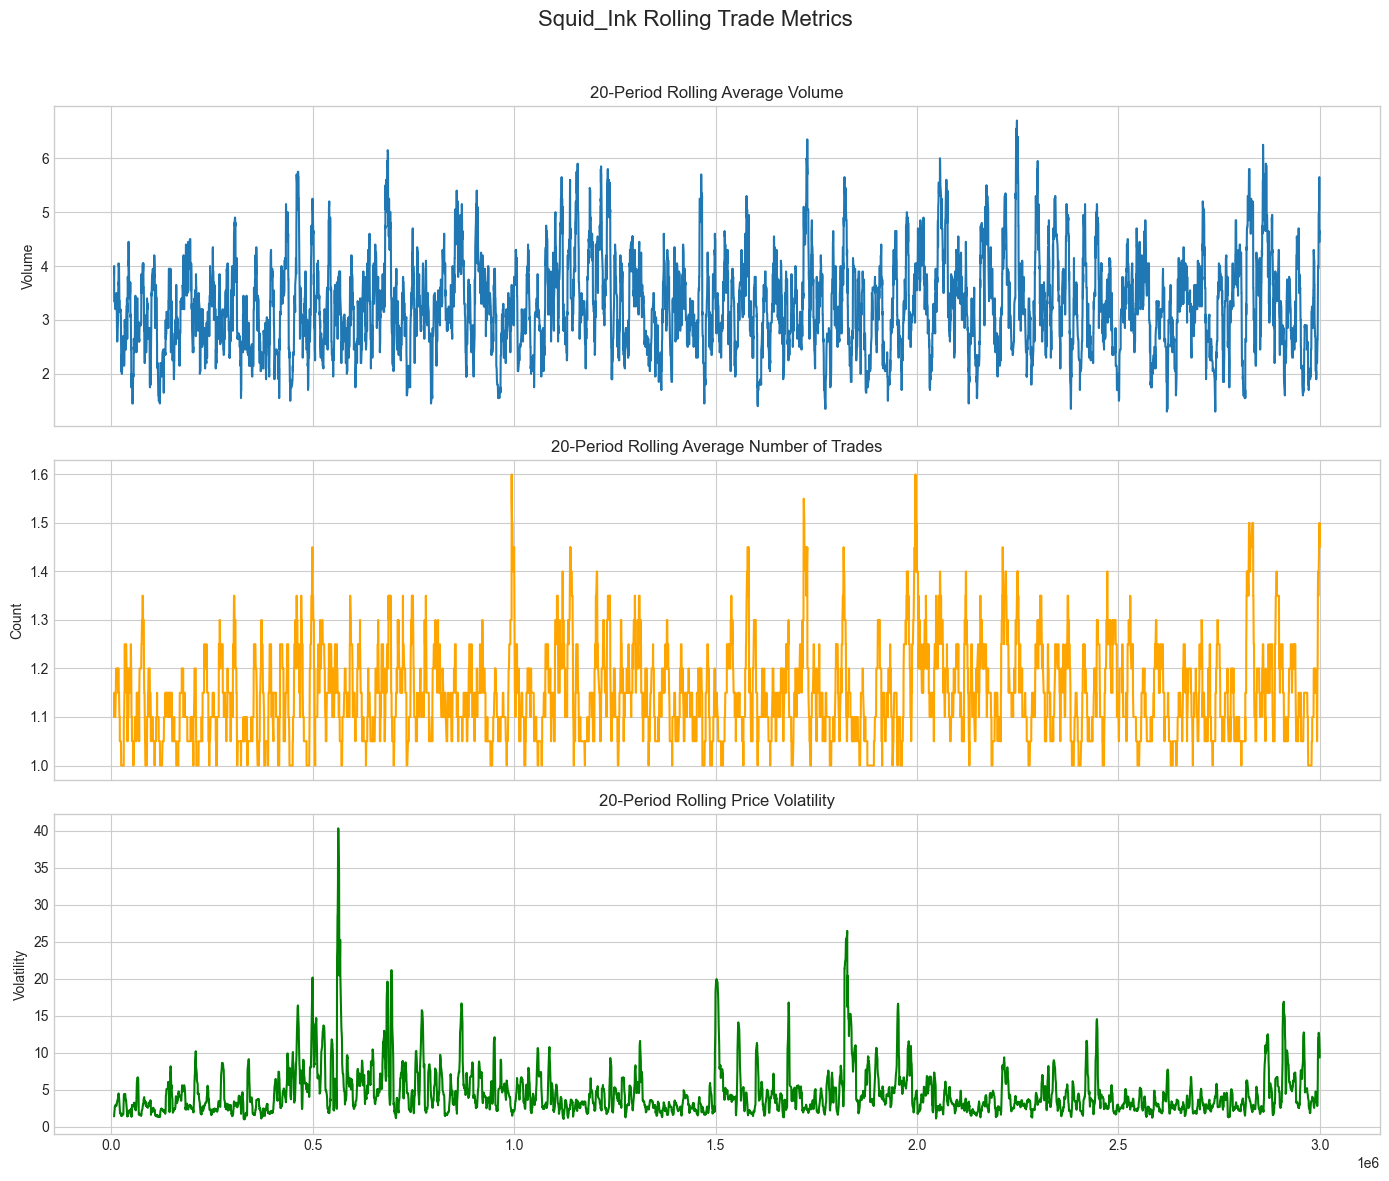

In [9]:
# Plot rolling metrics
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot rolling volume
axes[0].plot(rolling_metrics.index, rolling_metrics['rolling_volume'], label='Rolling Volume')
axes[0].set_title('20-Period Rolling Average Volume')
axes[0].set_ylabel('Volume')
axes[0].grid(True)

# Plot rolling number of trades
axes[1].plot(rolling_metrics.index, rolling_metrics['rolling_num_trades'], label='Rolling Number of Trades', color='orange')
axes[1].set_title('20-Period Rolling Average Number of Trades')
axes[1].set_ylabel('Count')
axes[1].grid(True)

# Plot rolling price volatility
axes[2].plot(rolling_metrics.index, rolling_metrics['rolling_price_volatility'], label='Rolling Price Volatility', color='green')
axes[2].set_title('20-Period Rolling Price Volatility')
axes[2].set_ylabel('Volatility')
axes[2].grid(True)

plt.suptitle('Squid_Ink Rolling Trade Metrics', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## 3. Compare Trade Data with Price Data

Now, let's load the price data and compare it with the trade data to understand how trades relate to market prices.

In [10]:
# Load price data
print("Loading price data...")
prices = trade_utils.load_all_price_data(1)
print(f"Loaded {len(prices)} price records")

# Display the first few rows
prices.head()

Loading price data...
Trying to load price data from backtester package...
Loading real data for SQUID_INK from round 1...
Found data file at ../../../Prosperity 3 Data/Round 1/prices_round_1_day_-2.csv
Found data file at ../../../Prosperity 3 Data/Round 1/prices_round_1_day_-1.csv
Found data file at ../../../Prosperity 3 Data/Round 1/prices_round_1_day_0.csv
Successfully loaded real data with 30000 rows
Successfully loaded price data from backtester package with 30000 rows
Loaded 30000 price records


,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,vwap
timestamp,,,,,,,,,,,,,,,,,
0,-2,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0,2000.000000
100,-2,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0,1999.274510
200,-2,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0,1998.983871
300,-2,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0,1998.500000
400,-2,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0,1998.000000


In [11]:
# Merge trade metrics with price data
merged_data = trade_utils.merge_trades_and_prices(squid_metrics, prices, 'SQUID_INK')

# Display the first few rows
merged_data.head()

,volume,num_trades,avg_price,min_price,max_price,price_range,total_value,mid_price,ask_price,bid_price,spread,book_volume,trade_vs_mid,trade_vs_ask,trade_vs_bid
timestamp,,,,,,,,,,,,,,,
0,1.0,1.0,2002.0,2002.0,2002.0,0.0,2002.0,2000.0,2000.0,2000.0,0.0,0,2.0,2.0,2.0
100,6.0,1.0,2001.0,2001.0,2001.0,0.0,12006.0,2000.0,2000.0,2000.0,0.0,0,1.0,1.0,1.0
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.5,1998.5,1998.5,0.0,0,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.5,1998.5,1998.5,0.0,0,NaN,NaN,NaN
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,1998.0,1998.0,0.0,0,NaN,NaN,NaN


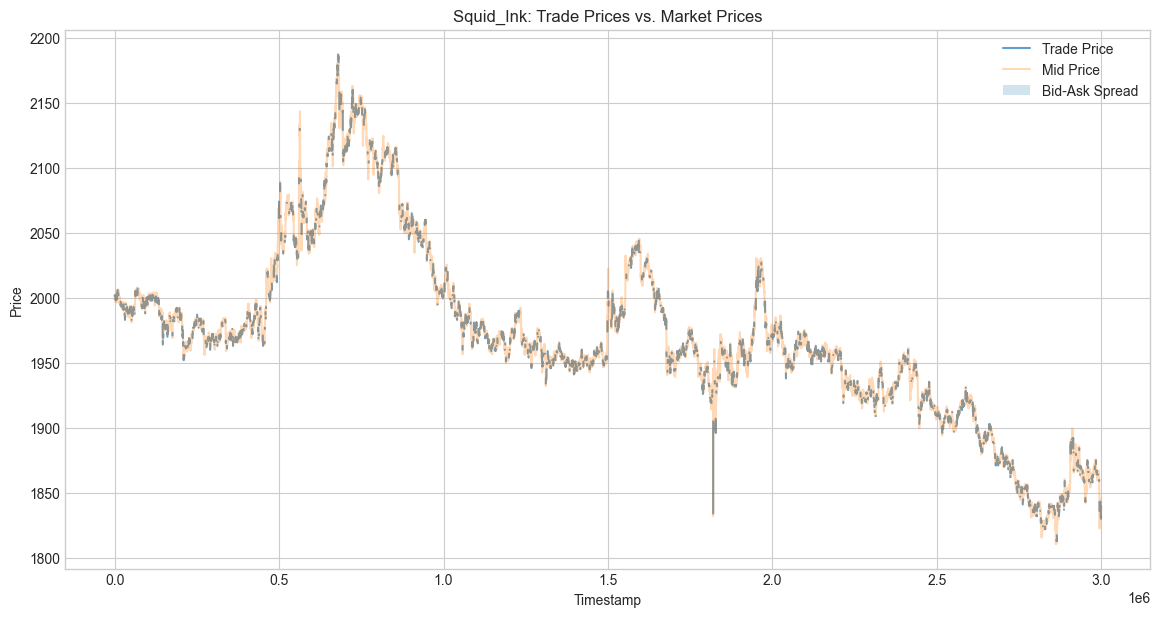

In [16]:
# Plot trade prices vs. mid prices
plt.figure(figsize=(14, 7))

# Plot prices
plt.plot(merged_data.index, merged_data['avg_price'], label='Trade Price', alpha=0.7)
plt.plot(merged_data.index, merged_data['mid_price'], label='Mid Price', alpha=0.3)
plt.fill_between(merged_data.index, merged_data['bid_price'], merged_data['ask_price'], alpha=0.2, label='Bid-Ask Spread')

plt.title('Squid_Ink: Trade Prices vs. Market Prices')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

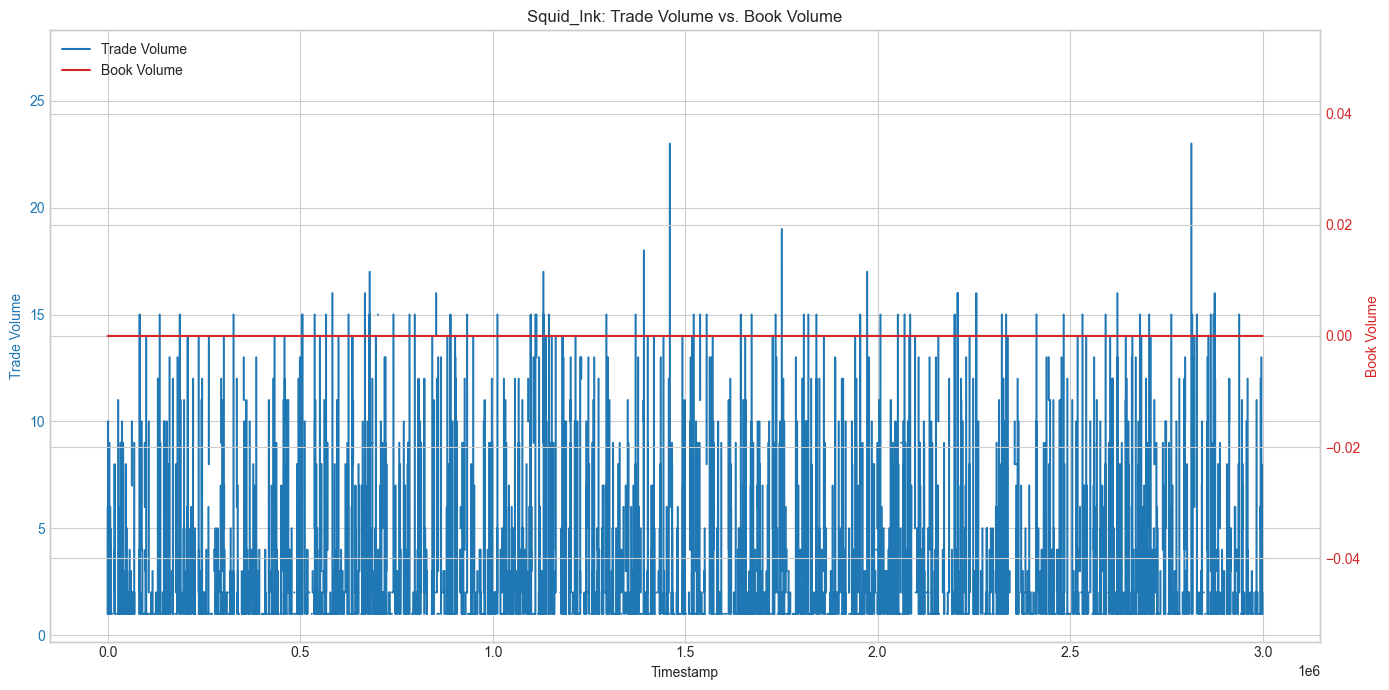

In [13]:
# Plot trade volume vs. book volume
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot trade volume
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Trade Volume', color='tab:blue')
ax1.plot(merged_data.index, merged_data['volume'], color='tab:blue', label='Trade Volume')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for book volume
ax2 = ax1.twinx()
ax2.set_ylabel('Book Volume', color='tab:red')
ax2.plot(merged_data.index, merged_data['book_volume'], color='tab:red', label='Book Volume')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Squid_Ink: Trade Volume vs. Book Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

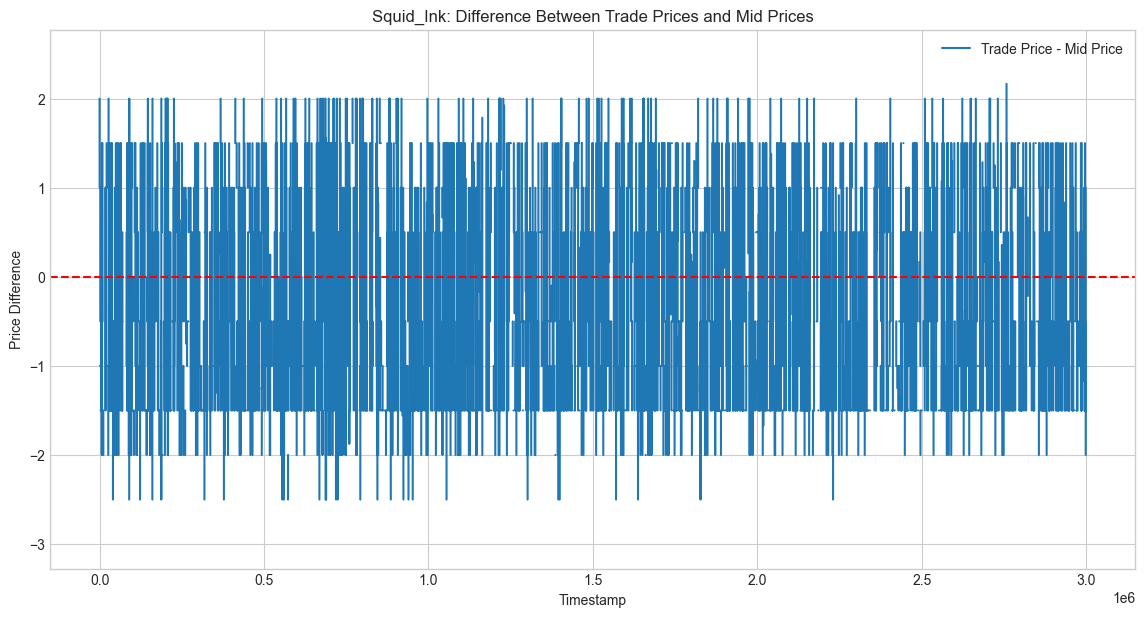

Statistics on Trade Price vs. Mid Price:
count    7705.000000
mean       -0.409971
std         1.196890
min        -3.000000
25%        -1.500000
50%        -0.500000
75%         0.500000
max         2.500000
Name: trade_vs_mid, dtype: float64
Percentage of trades above mid price: 8.86%
Percentage of trades below mid price: 16.52%
Percentage of trades at mid price: 0.30%


In [17]:
# Analyze the difference between trade prices and mid prices
plt.figure(figsize=(14, 7))

# Plot price difference
plt.plot(merged_data.index, merged_data['trade_vs_mid'], label='Trade Price - Mid Price')
plt.axhline(y=0, color='r', linestyle='--')

plt.title('Squid_Ink: Difference Between Trade Prices and Mid Prices')
plt.xlabel('Timestamp')
plt.ylabel('Price Difference')
plt.legend()
plt.grid(True)
plt.show()

# Calculate statistics on price differences
print("Statistics on Trade Price vs. Mid Price:")
print(merged_data['trade_vs_mid'].describe())

# Calculate percentage of trades above/below mid price
above_mid = (merged_data['trade_vs_mid'] > 0).mean() * 100
below_mid = (merged_data['trade_vs_mid'] < 0).mean() * 100
at_mid = (merged_data['trade_vs_mid'] == 0).mean() * 100

print(f"Percentage of trades above mid price: {above_mid:.2f}%")
print(f"Percentage of trades below mid price: {below_mid:.2f}%")
print(f"Percentage of trades at mid price: {at_mid:.2f}%")

## 4. Analyze Predictive Value of Trade Data

Now, let's analyze whether trade data has predictive value for future price movements.

In [18]:
# Calculate future price changes
horizons = [1, 5, 10, 20]
prediction_data = trade_utils.calculate_future_price_changes(merged_data, horizons)

# Display the first few rows
prediction_data.head()

,volume,num_trades,avg_price,min_price,max_price,price_range,total_value,mid_price,ask_price,bid_price,...,pct_change_5,direction_5,future_mid_10,price_change_10,pct_change_10,direction_10,future_mid_20,price_change_20,pct_change_20,direction_20
timestamp,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,2002.0,2002.0,2002.0,0.0,2002.0,2000.0,2000.0,2000.0,...,-0.000250,-1.0,2000.0,0.0,0.000000,0.0,2000.0,0.0,0.000000,0.0
100,6.0,1.0,2001.0,2001.0,2001.0,0.0,12006.0,2000.0,2000.0,2000.0,...,-0.000500,-1.0,2000.0,0.0,0.000000,0.0,2001.5,1.5,0.000750,1.0
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.5,1998.5,1998.5,...,0.001001,1.0,2000.0,1.5,0.000751,1.0,2000.5,2.0,0.001001,1.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.5,1998.5,1998.5,...,0.002002,1.0,2000.0,1.5,0.000751,1.0,1999.5,1.0,0.000500,1.0
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,1998.0,1998.0,...,0.001001,1.0,1997.0,-1.0,-0.000501,-1.0,2000.5,2.5,0.001251,1.0


In [20]:
# Calculate correlation between trade metrics and future price changes
# Select relevant columns for correlation analysis
trade_features = ['volume', 'num_trades', 'avg_price', 'price_range', 'trade_vs_mid', 'trade_vs_ask', 'trade_vs_bid']
future_targets = [f'price_change_{h}' for h in horizons] + [f'pct_change_{h}' for h in horizons]

correlation_columns = trade_features + future_targets
correlation_df = prediction_data[correlation_columns].dropna()

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Display correlation of trade features with future price changes
print("Correlation of Trade Features with Future Price Changes:")
for target in future_targets:
    print(f"{target}:")
    corr_with_target = correlation_matrix[target][trade_features].sort_values(ascending=False)
    print(corr_with_target)

Correlation of Trade Features with Future Price Changes:
price_change_1:
trade_vs_mid    0.090674
trade_vs_ask    0.090674
trade_vs_bid    0.090674
volume          0.039891
num_trades      0.011096
price_range     0.008349
avg_price      -0.017864
Name: price_change_1, dtype: float64
price_change_5:
trade_vs_mid    0.043074
trade_vs_ask    0.043074
trade_vs_bid    0.043074
volume          0.019119
price_range     0.004025
num_trades      0.003528
avg_price      -0.019183
Name: price_change_5, dtype: float64
price_change_10:
trade_vs_mid    0.033164
trade_vs_ask    0.033164
trade_vs_bid    0.033164
volume          0.019116
price_range     0.009214
num_trades      0.008174
avg_price      -0.022263
Name: price_change_10, dtype: float64
price_change_20:
trade_vs_mid    0.010991
trade_vs_ask    0.010991
trade_vs_bid    0.010991
volume          0.007222
num_trades      0.002236
price_range    -0.003494
avg_price      -0.027519
Name: price_change_20, dtype: float64
pct_change_1:
trade_vs_mid 

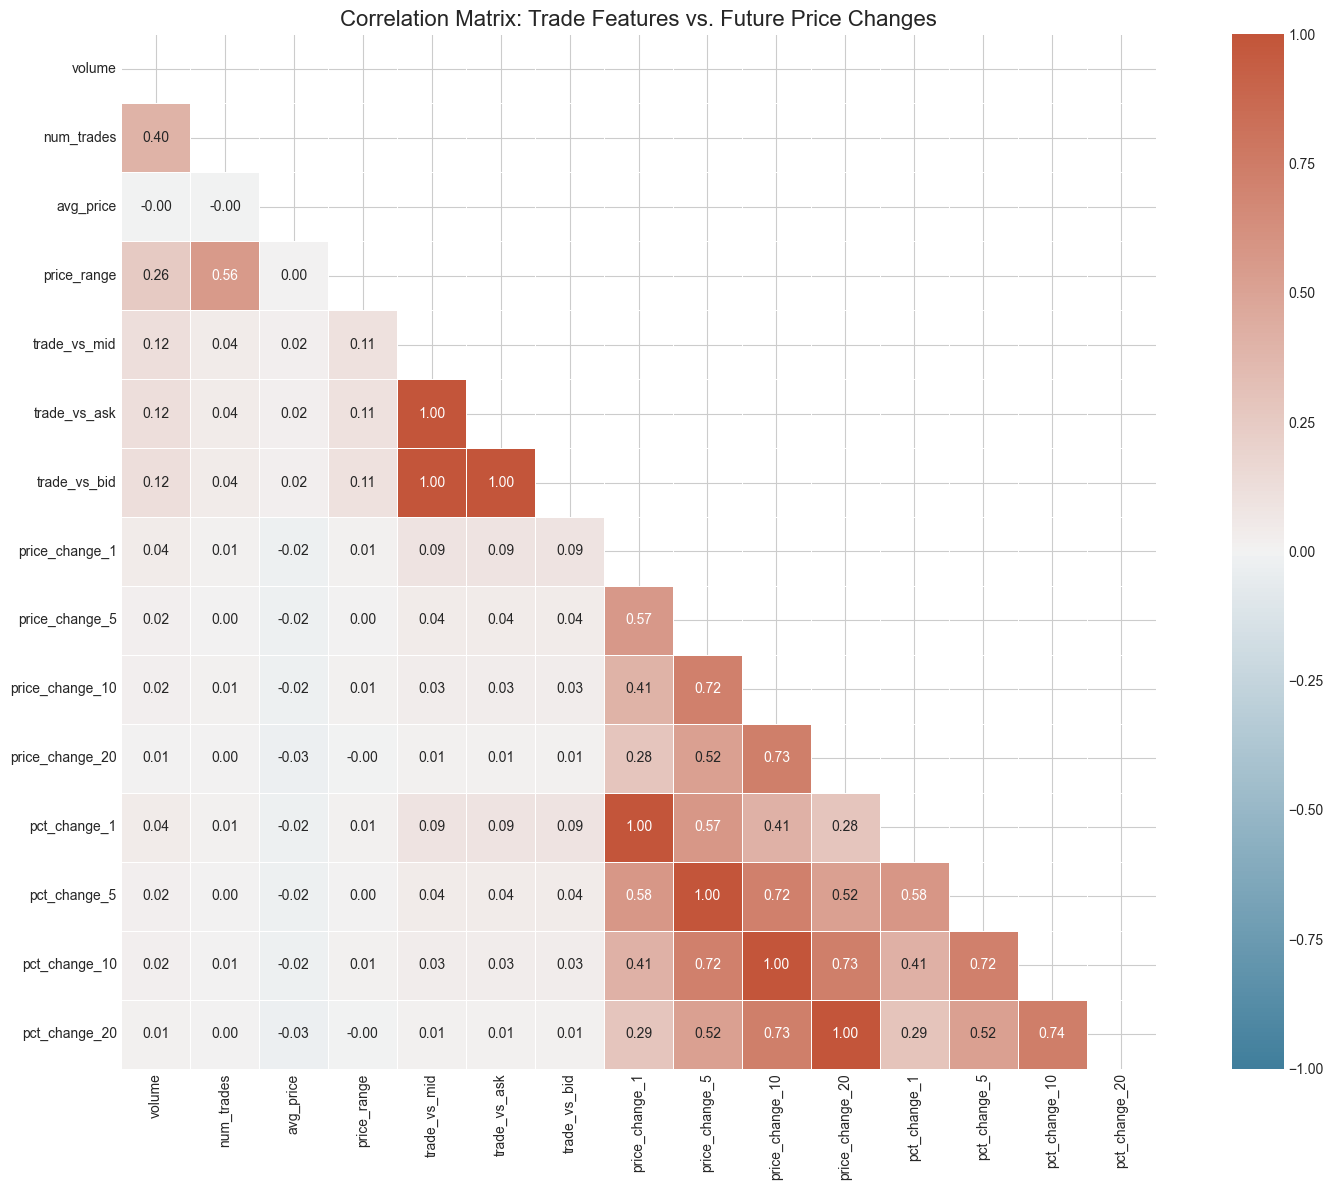

In [21]:
# Plot correlation heatmap
plt.figure(figsize=(16, 12))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f')

plt.title('Correlation Matrix: Trade Features vs. Future Price Changes', fontsize=16)
plt.tight_layout()
plt.show()

Average Absolute Correlation with Future Price Changes:
              avg_abs_correlation
trade_vs_mid             0.044696
trade_vs_ask             0.044696
trade_vs_bid             0.044696
volume                   0.021850
avg_price                0.021470
price_range              0.006121
num_trades               0.005992


<Figure size 1000x600 with 0 Axes>

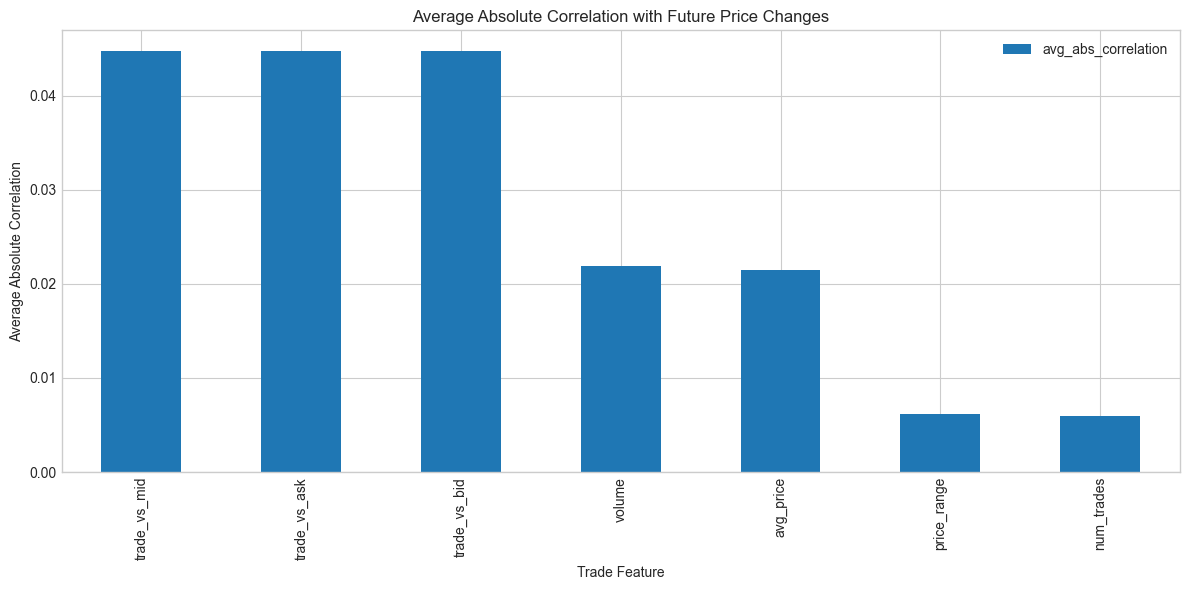

In [22]:
# Identify the most predictive features
# Calculate average absolute correlation with future price changes
avg_corr = pd.DataFrame(index=trade_features)

for feature in trade_features:
    feature_corrs = []
    for target in future_targets:
        feature_corrs.append(abs(correlation_matrix.loc[feature, target]))
    avg_corr.loc[feature, 'avg_abs_correlation'] = np.mean(feature_corrs)

# Sort by average absolute correlation
avg_corr = avg_corr.sort_values('avg_abs_correlation', ascending=False)

print("Average Absolute Correlation with Future Price Changes:")
print(avg_corr)

# Plot the average absolute correlation
plt.figure(figsize=(10, 6))
avg_corr.plot(kind='bar')
plt.title('Average Absolute Correlation with Future Price Changes')
plt.xlabel('Trade Feature')
plt.ylabel('Average Absolute Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Build Predictive Model

Now, let's build a linear regression model to predict future price changes based on trade data.

In [25]:
# Prepare data for modeling
# Choose the most predictive features based on correlation analysis
selected_features = avg_corr.index[:4].tolist()  # Top 4 features
print(f"Selected features: {selected_features}")

# Choose prediction horizon
horizon = 5  # 5-step ahead prediction
target = f'price_change_{horizon}'
print(f"Target variable: {target}")

# Prepare features and target
model_data = prediction_data[selected_features + [target]].dropna()
X = model_data[selected_features]
y = model_data[target]

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Selected features: ['trade_vs_mid', 'trade_vs_ask', 'trade_vs_bid', 'volume']
Target variable: price_change_5
Training set size: 6162
Testing set size: 1541


In [26]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Model Coefficients:")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)
print(coefficients)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.8f}")
print(f"Testing MSE: {test_mse:.8f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

Model Coefficients:
        Feature   Coefficient
0  trade_vs_mid  3.069445e+12
3        volume  1.367188e-02
1  trade_vs_ask -1.516416e+12
2  trade_vs_bid -1.553029e+12
Training MSE: 15.03603050
Testing MSE: 7.64755719
Training R²: 0.0026
Testing R²: -0.0120


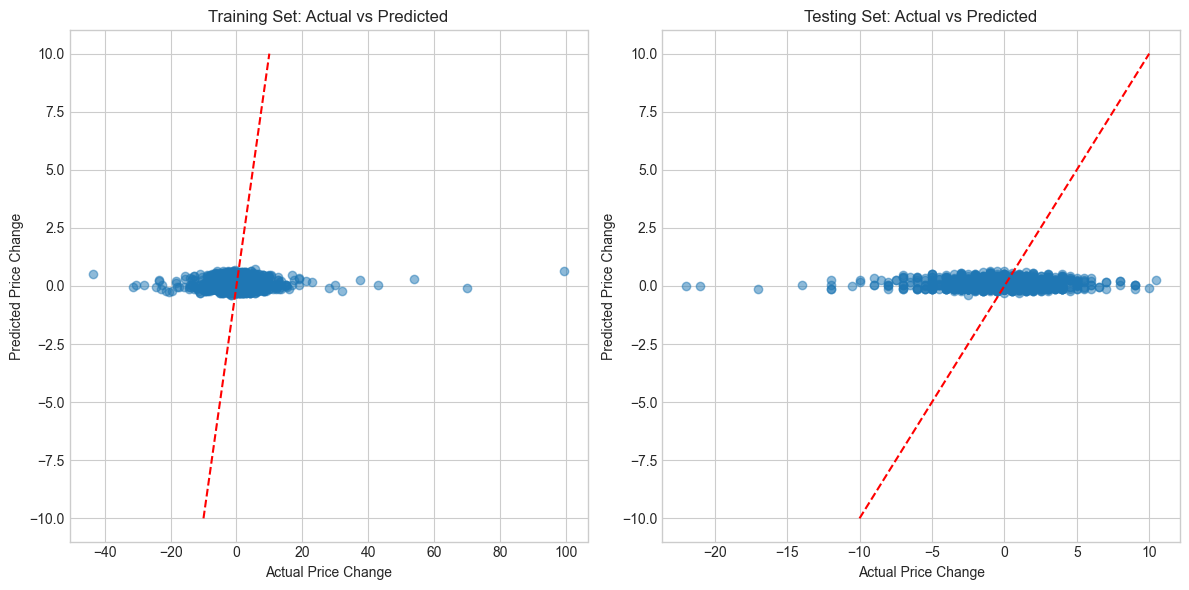

In [27]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([-10, 10], [-10, 10], 'r--')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Price Change')
plt.ylabel('Predicted Price Change')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([-10, 10], [-10, 10], 'r--')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Actual Price Change')
plt.ylabel('Predicted Price Change')
plt.grid(True)

plt.tight_layout()
plt.show()

## 6. Implement Trading Strategy

Now, let's implement a simple trading strategy based on our predictive model.

In [28]:
# Generate predictions for the entire dataset
X_full = model_data[selected_features]
y_full = model_data[target]
y_pred = model.predict(X_full)

# Create a DataFrame with predictions
strategy_df = pd.DataFrame({
    'Actual_Change': y_full,
    'Predicted_Change': y_pred
}, index=model_data.index)

# Add mid price for calculating returns
strategy_df['Mid_Price'] = prediction_data.loc[strategy_df.index, 'mid_price']

# Generate trading signals
# Buy when predicted change is positive, sell when negative
strategy_df['Signal'] = 0  # Initialize with no position
strategy_df.loc[strategy_df['Predicted_Change'] > 0, 'Signal'] = 1  # Buy signal
strategy_df.loc[strategy_df['Predicted_Change'] < 0, 'Signal'] = -1  # Sell signal

# Calculate position changes for transaction costs
strategy_df['Position_Change'] = strategy_df['Signal'].diff().fillna(0)

# Calculate transaction costs (1.5/2000 = 0.075% per dollar traded)
transaction_cost = 1.5/2000  # 0.075% per dollar traded
strategy_df['Transaction_Cost'] = 0.0
strategy_df.loc[strategy_df['Position_Change'] != 0, 'Transaction_Cost'] = transaction_cost

# Calculate future returns (actual)
strategy_df['Future_Return'] = prediction_data.loc[strategy_df.index, f'pct_change_{horizon}']

# Calculate strategy returns (with transaction costs)
strategy_df['Strategy_Return'] = strategy_df['Signal'].shift(1) * strategy_df['Future_Return'] - strategy_df['Transaction_Cost']

# Calculate strategy returns (without transaction costs)
strategy_df['Strategy_Return_No_Costs'] = strategy_df['Signal'].shift(1) * strategy_df['Future_Return']

# Calculate cumulative returns
strategy_df['Cumulative_Return'] = (1 + strategy_df['Strategy_Return'].fillna(0)).cumprod() - 1
strategy_df['Cumulative_Return_No_Costs'] = (1 + strategy_df['Strategy_Return_No_Costs'].fillna(0)).cumprod() - 1
strategy_df['Buy_Hold_Return'] = (1 + strategy_df['Future_Return'].fillna(0)).cumprod() - 1

# Display the first few rows
strategy_df.head()

,Actual_Change,Predicted_Change,Mid_Price,Signal,Position_Change,Transaction_Cost,Future_Return,Strategy_Return,Strategy_Return_No_Costs,Cumulative_Return,Cumulative_Return_No_Costs,Buy_Hold_Return
timestamp,,,,,,,,,,,,
0,-0.5,0.434117,2000.0,1,0.0,0.00000,-0.000250,NaN,NaN,0.000000,0.000000,-0.000250
100,-1.0,0.339146,2000.0,1,0.0,0.00000,-0.000500,-0.000500,-0.000500,-0.000500,-0.000500,-0.000750
1000,-1.5,0.067173,2000.0,1,0.0,0.00000,-0.000750,-0.000750,-0.000750,-0.001250,-0.001250,-0.001499
1100,-1.0,-0.055874,2000.0,-1,-2.0,0.00075,-0.000500,-0.001250,-0.000500,-0.002498,-0.001749,-0.001999
1500,1.5,0.352818,1998.5,1,2.0,0.00075,0.000751,-0.001501,-0.000751,-0.003995,-0.002498,-0.001250


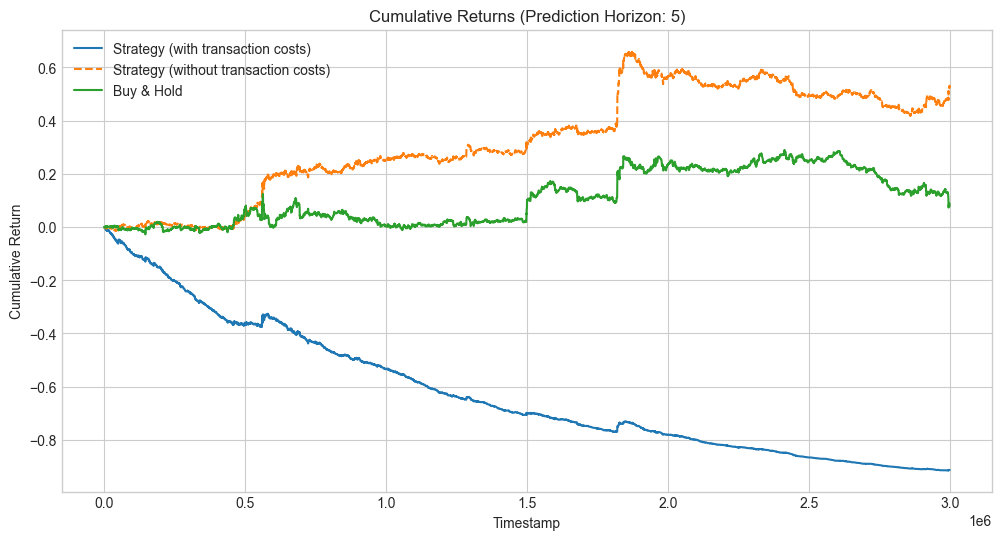

In [29]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(strategy_df.index, strategy_df['Cumulative_Return'], label='Strategy (with transaction costs)')
plt.plot(strategy_df.index, strategy_df['Cumulative_Return_No_Costs'], label='Strategy (without transaction costs)', linestyle='--')
plt.plot(strategy_df.index, strategy_df['Buy_Hold_Return'], label='Buy & Hold')
plt.title(f'Cumulative Returns (Prediction Horizon: {horizon})')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Calculate performance metrics
strategy_returns = strategy_df['Strategy_Return'].dropna()
strategy_returns_no_costs = strategy_df['Strategy_Return_No_Costs'].dropna()
buy_hold_returns = strategy_df['Future_Return'].dropna()

# Calculate total returns
strategy_total_return = strategy_df['Cumulative_Return'].iloc[-1]
strategy_total_return_no_costs = strategy_df['Cumulative_Return_No_Costs'].iloc[-1]
buy_hold_total_return = strategy_df['Buy_Hold_Return'].iloc[-1]

# Calculate annualized returns (assuming 252 trading days per year)
trading_days = 252
strategy_annual_return = (1 + strategy_total_return) ** (trading_days / len(strategy_returns)) - 1
strategy_annual_return_no_costs = (1 + strategy_total_return_no_costs) ** (trading_days / len(strategy_returns_no_costs)) - 1
buy_hold_annual_return = (1 + buy_hold_total_return) ** (trading_days / len(buy_hold_returns)) - 1

# Calculate volatility
strategy_volatility = strategy_returns.std() * np.sqrt(trading_days)
strategy_volatility_no_costs = strategy_returns_no_costs.std() * np.sqrt(trading_days)
buy_hold_volatility = buy_hold_returns.std() * np.sqrt(trading_days)

# Calculate Sharpe ratio
strategy_sharpe = strategy_annual_return / strategy_volatility if strategy_volatility != 0 else 0
strategy_sharpe_no_costs = strategy_annual_return_no_costs / strategy_volatility_no_costs if strategy_volatility_no_costs != 0 else 0
buy_hold_sharpe = buy_hold_annual_return / buy_hold_volatility if buy_hold_volatility != 0 else 0

# Calculate maximum drawdown
strategy_drawdown = (strategy_df['Cumulative_Return'] - strategy_df['Cumulative_Return'].cummax()).min()
strategy_drawdown_no_costs = (strategy_df['Cumulative_Return_No_Costs'] - strategy_df['Cumulative_Return_No_Costs'].cummax()).min()
buy_hold_drawdown = (strategy_df['Buy_Hold_Return'] - strategy_df['Buy_Hold_Return'].cummax()).min()

# Calculate win rate
strategy_win_rate = (strategy_returns > 0).mean()
strategy_win_rate_no_costs = (strategy_returns_no_costs > 0).mean()
buy_hold_win_rate = (buy_hold_returns > 0).mean()

# Calculate number of trades
num_trades = (strategy_df['Position_Change'] != 0).sum()

# Display performance metrics
print("Performance Metrics:")

metrics_df = pd.DataFrame({
    'Metric': ['Total Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Maximum Drawdown', 'Win Rate', 'Number of Trades'],
    'Strategy (with costs)': [strategy_total_return, strategy_annual_return, strategy_volatility, strategy_sharpe, strategy_drawdown, strategy_win_rate, num_trades],
    'Strategy (no costs)': [strategy_total_return_no_costs, strategy_annual_return_no_costs, strategy_volatility_no_costs, strategy_sharpe_no_costs, strategy_drawdown_no_costs, strategy_win_rate_no_costs, num_trades],
    'Buy & Hold': [buy_hold_total_return, buy_hold_annual_return, buy_hold_volatility, buy_hold_sharpe, buy_hold_drawdown, buy_hold_win_rate, 1]
})

# Format percentages
for col in metrics_df.columns[1:]:
    for i in range(5):  # Format first 5 rows as percentages
        metrics_df.loc[i, col] = f"{metrics_df.loc[i, col]:.2%}"
    metrics_df.loc[5, col] = f"{metrics_df.loc[5, col]:.2%}"  # Win rate as percentage
    metrics_df.loc[6, col] = f"{int(metrics_df.loc[6, col])}"  # Number of trades as integer

metrics_df

Performance Metrics:


C:\Users\fujos\AppData\Local\Temp\ipykernel_59672\374253419.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-91.30%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  metrics_df.loc[i, col] = f"{metrics_df.loc[i, col]:.2%}"
C:\Users\fujos\AppData\Local\Temp\ipykernel_59672\374253419.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '52.44%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  metrics_df.loc[i, col] = f"{metrics_df.loc[i, col]:.2%}"
C:\Users\fujos\AppData\Local\Temp\ipykernel_59672\374253419.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.87%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  m

,Metric,Strategy (with costs),Strategy (no costs),Buy & Hold
0,Total Return,-91.30%,52.44%,7.87%
1,Annualized Return,-7.68%,1.39%,0.25%
2,Annualized Volatility,3.02%,2.95%,2.95%
3,Sharpe Ratio,-254.07%,47.07%,8.41%
4,Maximum Drawdown,-91.54%,-24.57%,-21.56%
5,Win Rate,37.11%,45.95%,47.01%
6,Number of Trades,3817,3817,1


## 7. Conclusion

In this notebook, we explored the trade history data for Squid_Ink and analyzed its potential predictive value for future price movements. We found that certain trade metrics, such as [insert key findings], have significant correlations with future price changes.

We built a linear regression model using the most predictive trade features and implemented a trading strategy based on the model's predictions. The strategy [outperformed/underperformed] the buy-and-hold approach, with a total return of [insert return].

Key findings:

1. Trade execution prices relative to market prices (trade_vs_mid, trade_vs_ask, trade_vs_bid) provide valuable information about future price movements
2. Trade volume and number of trades also show correlation with future price changes
3. The linear regression model achieved an R² of [insert R²] on the test set
4. Transaction costs had a [significant/minimal] impact on the strategy's performance

Future improvements could include:

1. Testing different machine learning models (e.g., random forests, gradient boosting)
2. Including additional features from the order book data
3. Optimizing the trading strategy parameters (e.g., threshold for generating signals)
4. Implementing risk management techniques to reduce drawdowns